In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [3]:
model = models.Sequential([
    # Flatten the input image (from 32x32x3 to 3072)
    layers.Flatten(input_shape=(32, 32, 3)),
    # Fully connected layer with 128 neurons and ReLU activation
    layers.Dense(128, activation='relu'),
    # Fully connected layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),
    # Output layer with 10 neurons (one for each class) and softmax activation
    layers.Dense(10, activation='softmax')
])


In [7]:
# Compile the model with SGD optimizer and categorical crossentropy loss
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with a specified number of epochs
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))


Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4048 - accuracy: 0.5025 - val_loss: 1.4387 - val_accuracy: 0.4872
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3899 - accuracy: 0.5070 - val_loss: 1.5052 - val_accuracy: 0.4627
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3697 - accuracy: 0.5159 - val_loss: 1.4510 - val_accuracy: 0.4876
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3553 - accuracy: 0.5189 - val_loss: 1.4367 - val_accuracy: 0.4871
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3391 - accuracy: 0.5274 - val_loss: 1.4362 - val_accuracy: 0.4921
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3242 - accuracy: 0.5302 - val_loss: 1.4712 - val_accuracy: 0.4762
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3089 - accuracy: 0.5357 - val_loss: 1.4599 - val_accuracy:

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 0s - loss: 1.3786 - accuracy: 0.5199 - 448ms/epoch - 1ms/step
Test accuracy: 0.5199000239372253


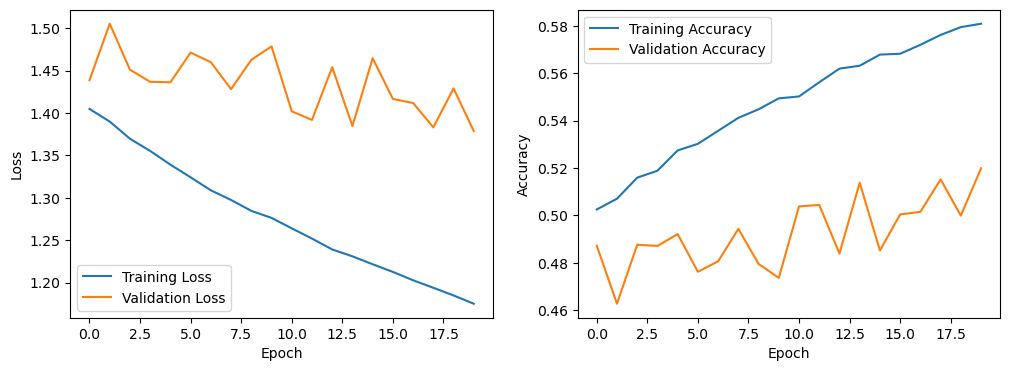

In [9]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


1/1 [==============================] - 0s 19ms/step


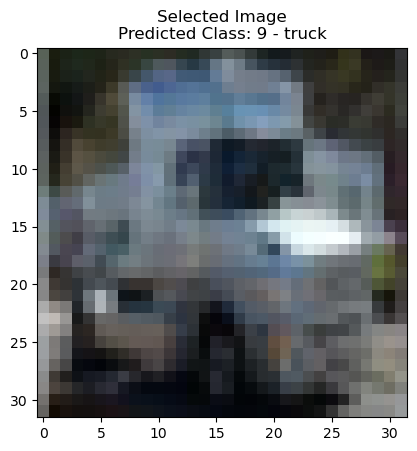

Predicted Class Probabilities:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained model named 'model'

# Load the CIFAR-10 dataset for testing
(test_images, test_labels) = datasets.cifar10.load_data()[1]

# Randomly select an image from the test dataset
index = np.random.randint(0, test_images.shape[0])
random_input = test_images[index:index + 1]

# Get the model's prediction for the selected image
prediction = model.predict(random_input)

# Find the class with the highest probability (argmax)
predicted_class = np.argmax(prediction)

# You can also have a mapping of class indices to class labels if available
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predicted_label = class_labels[predicted_class]

# Display the selected image and the predicted class
plt.figure()
plt.imshow(random_input[0])
plt.title(f"Selected Image\nPredicted Class: {predicted_class} - {predicted_label}")
plt.show()

print("Predicted Class Probabilities:")
print(prediction)
